In [ ]:
pip install tensorflow==2.15.1 ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 85.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.4 MB/s eta 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [ ]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
data_train.shape

(4457, 2)

In [ ]:
data_train.shape

(4457, 2)

**Prepare the data**

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df=data_train,
    text_column = 'text',
    label_columns = 'label',
    val_df = data_test,
    preprocess_mode = 'bert') # or distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
len(X_train)

2

In [ ]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilbert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [ ]:
type(model)

keras.src.engine.functional.Functional

In [ ]:
# here we have taken batch size as 6 as from the documentation it is
# recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 469s 604ms/step - loss: 0.2548 - accuracy: 0.9280
Epoch 2/2
743/743 [==============================] - 172s 231ms/step - loss: 1.2256 - accuracy: 0.7905


done.
Visually inspect loss plot and select learning rate associated with falling loss


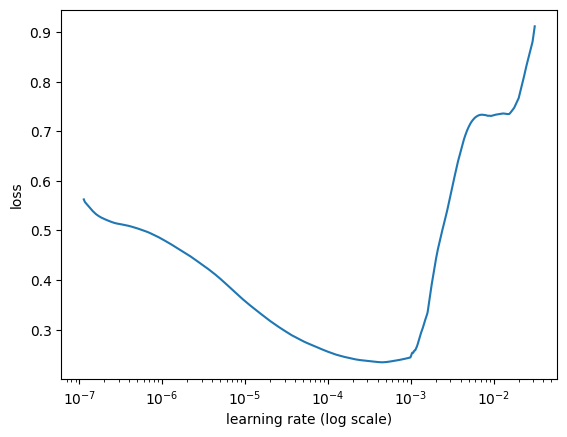

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 496s 668ms/step - loss: 0.3962 - accuracy: 0.8683 - val_loss: 0.4128 - val_accuracy: 0.8565


In [ ]:
file = open('sample.csv')
lines = file.readlines()

In [ ]:
predictor.predict(lines[0])

'ham'

In [ ]:
predictor.predict(lines[1])

'ham'

In [ ]:
predictor.predict(lines[2])

'ham'